# Exploring and Processing the Data

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv('housepricedata.csv')

In [30]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [31]:
dataset = df.values

In [32]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [33]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [34]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [35]:
from sklearn import preprocessing

In [36]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [37]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [40]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [41]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# Building and Training Our First Neural Network

In [42]:
from keras.models import Sequential
from keras.layers import Dense

In [43]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [44]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [45]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6963 - accuracy: 0.4100 - val_loss: 0.6912 - val_accuracy: 0.5297
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5000 - val_loss: 0.6863 - val_accuracy: 0.5160
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.4990 - val_loss: 0.6824 - val_accuracy: 0.5114
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.4980 - val_loss: 0.6786 - val_accuracy: 0.5114
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.5020 - val_loss: 0.6749 - val_accuracy: 0.5160
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6768 - accuracy: 0.5059 - val_loss: 0.6715 - val_accuracy: 0.5205
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6733 - accuracy: 0.5157 - val_loss: 0.6681 - val_accuracy: 0.5251
Epoch 8/100
3

Evaluating our data on the test set:

In [46]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.8813


0.8812785148620605

# Visualizing Loss and Accuracy

In [47]:
import matplotlib.pyplot as plt

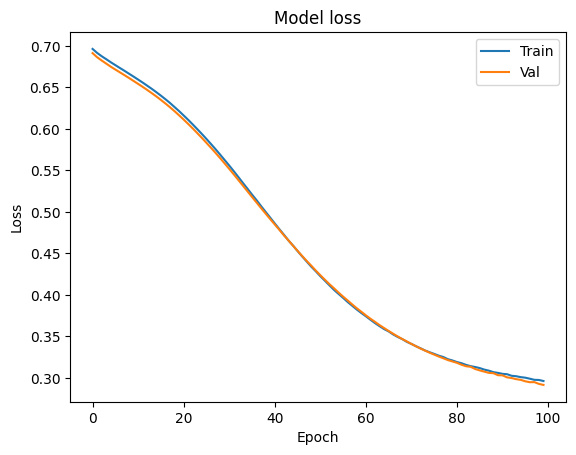

In [48]:
# model loss visualise
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

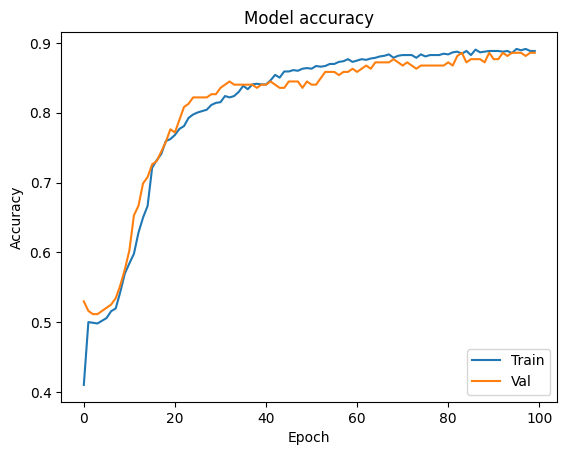

In [49]:
# model accuracy visualise
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Adding Regularization to our Neural Network

We'll train a model which will overfit, which we call Model 2.

In [50]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 37ms/step - loss: 0.4728 - accuracy: 0.7798 - val_loss: 0.4286 - val_accuracy: 0.7945
Epoch 2/100
32/32 [==============================] - 1s 24ms/step - loss: 0.3594 - accuracy: 0.8571 - val_loss: 0.3053 - val_accuracy: 0.8813
Epoch 3/100
32/32 [==============================] - 1s 21ms/step - loss: 0.3141 - accuracy: 0.8679 - val_loss: 0.3034 - val_accuracy: 0.8721
Epoch 4/100
32/32 [==============================] - 1s 21ms/step - loss: 0.3011 - accuracy: 0.8689 - val_loss: 0.2749 - val_accuracy: 0.8767
Epoch 5/100
32/32 [==============================] - 1s 22ms/step - loss: 0.2882 - accuracy: 0.8816 - val_loss: 0.3090 - val_accuracy: 0.8630
Epoch 6/100
32/32 [==============================] - 1s 20ms/step - loss: 0.2709 - accuracy: 0.8865 - val_loss: 0.2678 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 1s 21ms/step - loss: 0.2795 - accuracy: 0.8924 - val_loss: 0.3333 - val_accuracy: 0.8995
Epoch 

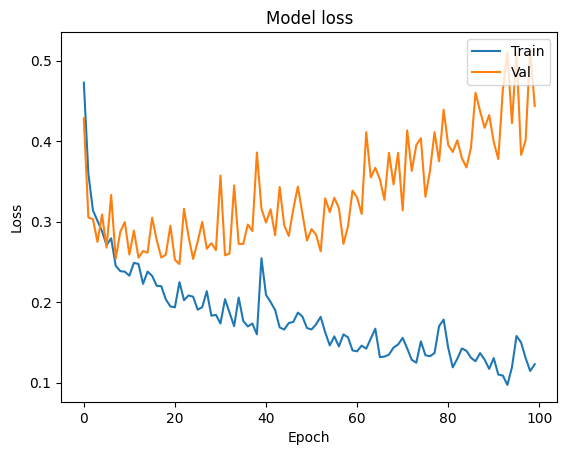

In [51]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

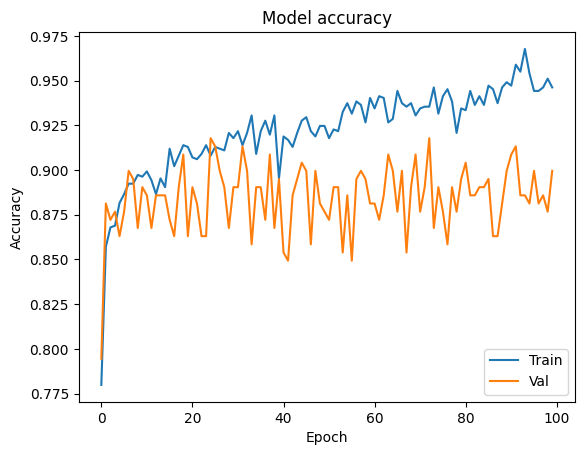

In [52]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

To address the overfitting we see in Model 2, we'll incorporate L2 regularization and dropout in our third model here (Model 3).

In [53]:
from keras.layers import Dropout
from keras import regularizers

In [54]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [55]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 31ms/step - loss: 14.2394 - accuracy: 0.6546 - val_loss: 3.8892 - val_accuracy: 0.8356
Epoch 2/100
32/32 [==============================] - 1s 38ms/step - loss: 1.6867 - accuracy: 0.8131 - val_loss: 0.7223 - val_accuracy: 0.8219
Epoch 3/100
32/32 [==============================] - 1s 25ms/step - loss: 0.6045 - accuracy: 0.8376 - val_loss: 0.5211 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 1s 24ms/step - loss: 0.5282 - accuracy: 0.8620 - val_loss: 0.5003 - val_accuracy: 0.8676
Epoch 5/100
32/32 [==============================] - 1s 24ms/step - loss: 0.5071 - accuracy: 0.8601 - val_loss: 0.4856 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 1s 25ms/step - loss: 0.4944 - accuracy: 0.8630 - val_loss: 0.4639 - val_accuracy: 0.8767
Epoch 7/100
32/32 [==============================] - 1s 24ms/step - loss: 0.4779 - accuracy: 0.8748 - val_loss: 0.4556 - val_accuracy: 0.8813
Epoch

We'll now plot the loss and accuracy graphs for Model 3. You'll notice that the loss is a lot higher at the start, and that's because we've changed our loss function. To plot such that the window is zoomed in between 0 and 1.2 for the loss, we add an additional line of code (plt.ylim) when plotting

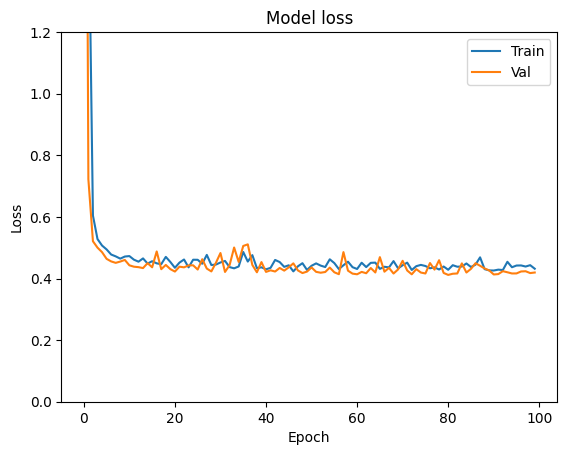

In [56]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

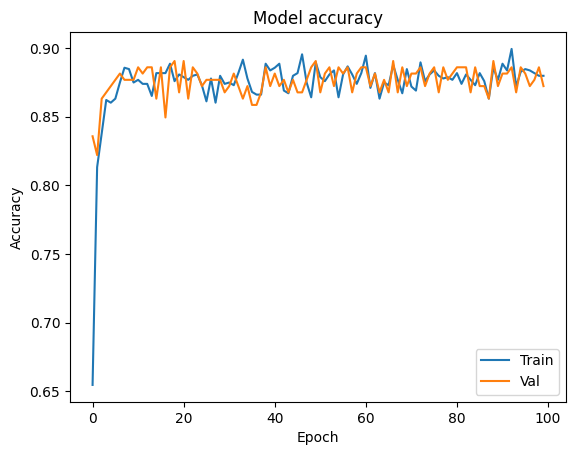

In [57]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

As compared to Model 2, you should see that there's less overfitting!